<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

In [2]:
import warnings
warnings.filterwarnings('ignore')

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [3]:
# Your code here
import pandas as pd
import requests
from bs4 import BeautifulSoup

Download the webpage at the url


In [4]:
#your code goes here
data  = requests.get(url).text

Create a soup object


In [6]:
#your code goes here
soup = BeautifulSoup(data)

Scrape the `Language name` and `annual average salary`.


In [7]:
#your code goes here
lang_sal_data = pd.DataFrame(columns=["Language", "Average Annual Salary"])
for row in soup.find("tbody").find_all('tr')[1:]:
    col = row.find_all("td")
    language = col[1].text
    avg_annual_sal = col[3].text
    
    # Finally we append the data of each row to the table
    lang_sal_data = lang_sal_data.append({"Language":language, "Average Annual Salary":avg_annual_sal}, ignore_index=True) 
   

In [22]:
 lang_sal_data["Average Annual Salary"] = lang_sal_data["Average Annual Salary"].str.replace(',|\$',"")

In [23]:
 lang_sal_data

,Language,Average Annual Salary
0,Python,114383
1,Java,101013
2,R,92037
3,Javascript,110981
4,Swift,130801
5,C++,113865
6,C#,88726
7,PHP,84727
8,SQL,84793
9,Go,94082


Save the scrapped data into a file named *popular-languages.csv*


In [24]:
# your code goes here

lang_sal_data.to_csv('popular-languages.csv')

In [31]:
lang_sal_data=pd.read_csv('popular-languages.csv', index_col=0).sort_values(by='Average Annual Salary', axis=0, ascending=False, kind='quicksort', ignore_index=True)
lang_sal_data

,Language,Average Annual Salary
0,Swift,130801
1,Python,114383
2,C++,113865
3,Javascript,110981
4,Java,101013
5,Go,94082
6,R,92037
7,C#,88726
8,SQL,84793
9,PHP,84727


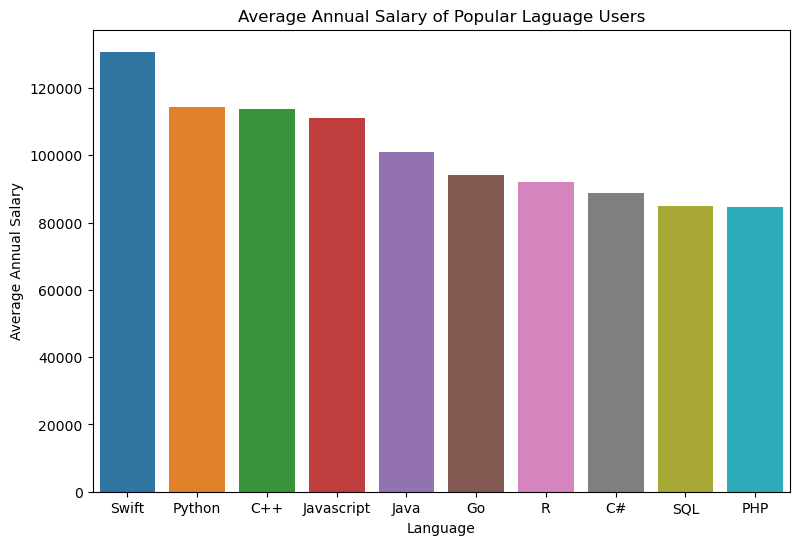

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [9, 6]

sns.barplot(data = lang_sal_data, y = 'Average Annual Salary', x = 'Language')
plt.title('Average Annual Salary of Popular Laguage Users')

plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
